In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import logging
from pathlib import Path

import numpy as np
import numpyro

from hb_mep.config import HBMepConfig
from hb_mep.data_access import DataClass
from hb_mep.experiments import Experiment
from hb_mep.models import Baseline
from hb_mep.utils import plot

numpyro.set_platform('cpu')
numpyro.set_host_device_count(4)
numpyro.enable_x64()

PARENT_PATH = Path(os.getcwd()).parent.parent.absolute()
FORMAT = "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
logging.basicConfig(format=FORMAT, level=logging.INFO)

#### Load config

In [3]:
config = HBMepConfig()
config.CURRENT_PATH = PARENT_PATH

experiment = Experiment(config)

#### Simulate data and preprocess

In [4]:
df, a, a_mean = experiment.simulate(random_seed=29, n_participant=5, n_segment=3, sparse_factor=0.0)

2023-04-16 19:23:20,863 - jax._src.xla_bridge - INFO - Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
2023-04-16 19:23:20,864 - jax._src.xla_bridge - INFO - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-04-16 19:23:20,864 - jax._src.xla_bridge - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-04-16 19:23:20,866 - jax._src.xla_bridge - INFO - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-04-16 19:23:20,866 - jax._src.xla_bridge - INFO - Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
2023-04-16 19:23:20,916 - hb_mep.experiments.experiment - INFO - Random seed: 29
2023-04-16 19:23:2

#### Plot simulated data

2023-04-16 19:23:24,027 - hb_mep.utils.utils - INFO - func:plot took: 0.74 sec


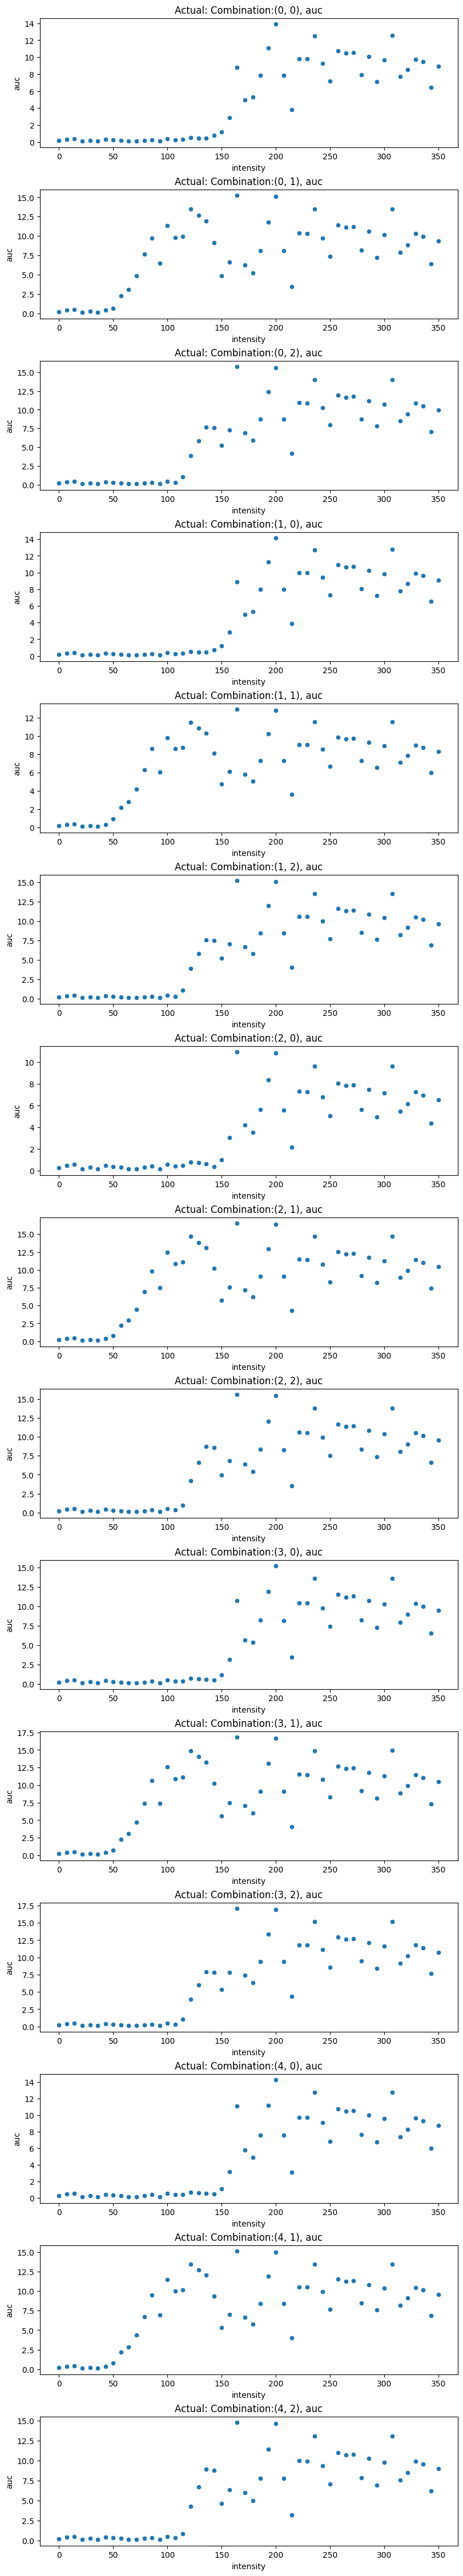

In [5]:
plot(df);

#### Initialize model

In [6]:
model = Baseline(config)

#### Run MCMC inference

In [7]:
mcmc, posterior_samples = model.run_inference(df=df)

2023-04-16 19:23:28,211 - hb_mep.models.baseline - INFO - Running inference with model Baseline ...


  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

2023-04-16 19:24:54,986 - hb_mep.utils.utils - INFO - func:run_inference took: 1 min and 26.78 sec


#### Diagnostics

In [8]:
mcmc.print_summary()


                           mean       std    median      5.0%     95.0%     n_eff     r_hat
               a[0,0]    115.23      3.29    114.76    110.66    120.45   2914.34      1.01
               a[0,1]     27.82      6.69     28.91     17.80     38.57   1660.58      1.01
               a[0,2]     92.51      4.65     93.39     84.95     99.02     15.19      1.09
               a[1,0]    115.26      3.31    115.11    110.44    120.27   3726.26      1.00
               a[1,1]     28.03      6.43     29.11     19.00     38.33   1452.17      1.01
               a[1,2]     91.35      4.04     91.48     84.57     97.76    788.18      1.01
               a[2,0]    113.60      4.35    114.40    107.20    119.88   1795.20      1.01
               a[2,1]     29.20      5.90     29.23     21.13     39.50   2188.05      1.00
               a[2,2]     91.91      4.98     92.97     84.08     98.61     18.24      1.13
               a[3,0]    114.59      3.57    114.44    109.63    120.10   2210.

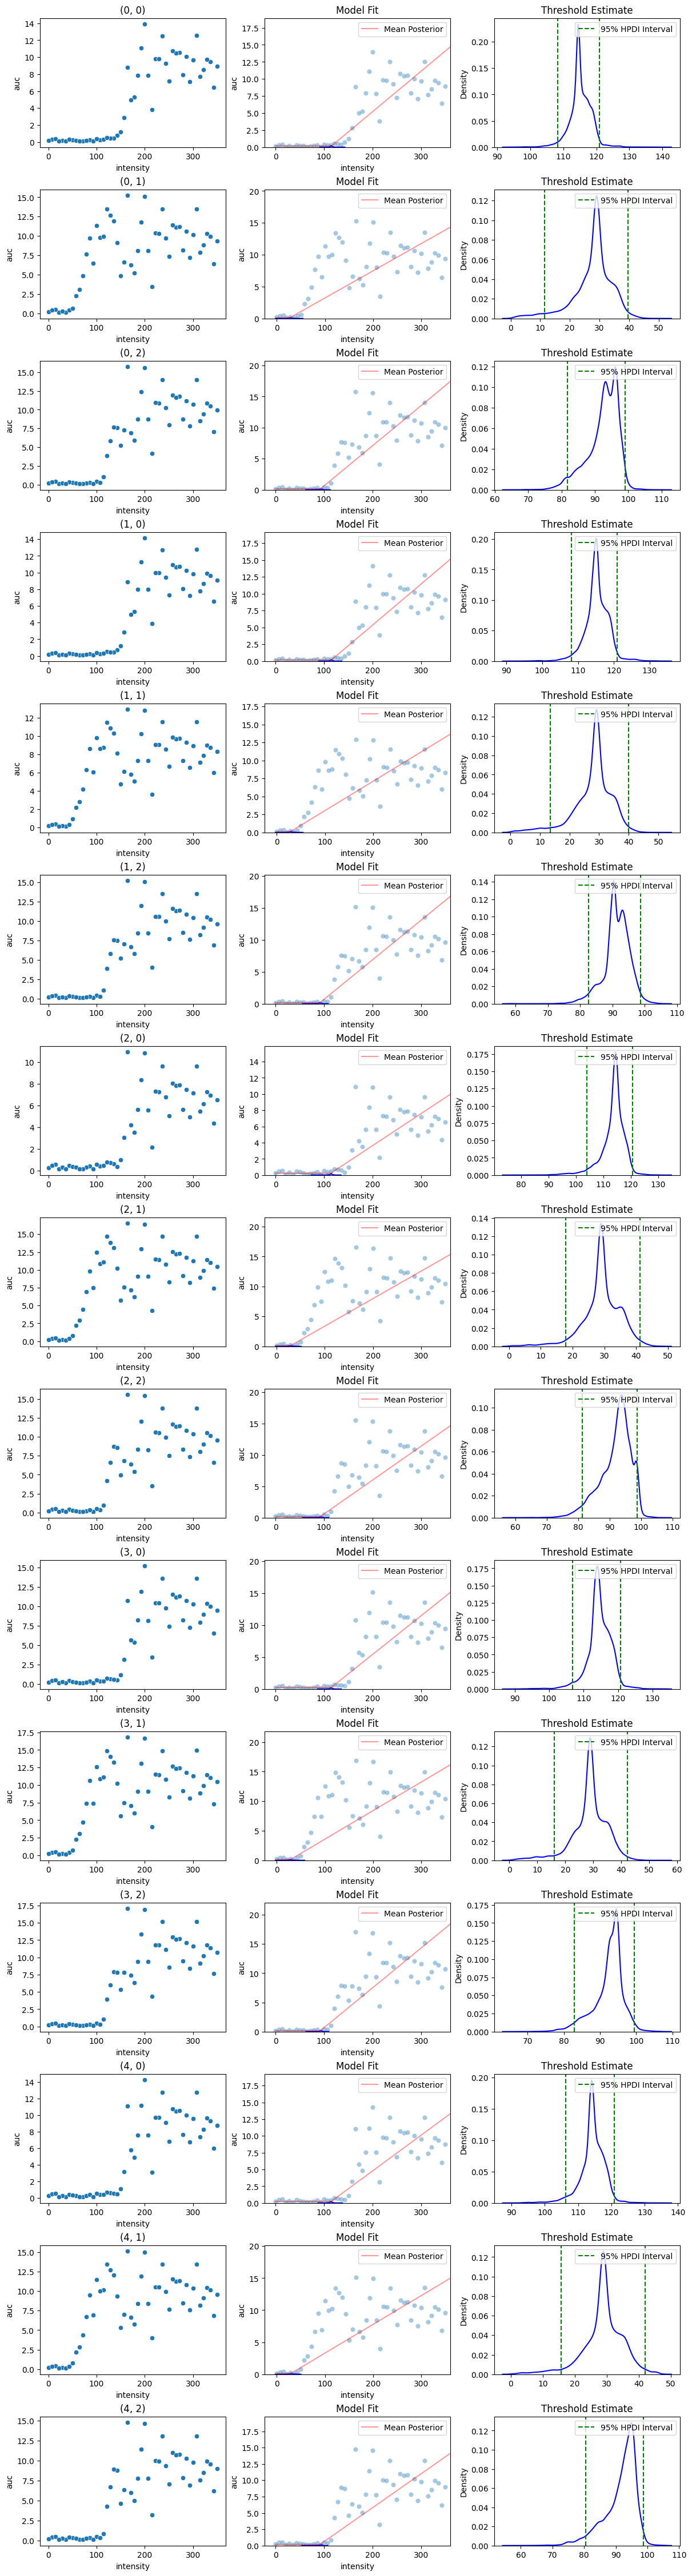

In [9]:
model.plot(df=df, posterior_samples=posterior_samples);

Note: We can see ReLU link function is underestimating thresholds due to data saturation. A link function that saturates is expected to overcome this limitation.